In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='youcefjd', api_key='')

In [2]:
data = pd.read_csv('/users/youcefdjeddar/downloads/meteorite-landings.csv')

In [3]:
#Extracting the needed data (from the top 10 classes)
top_10 = data['recclass'].value_counts().index.tolist()[:10]
df = data[data['recclass'].isin(top_10)]


In [4]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"


Text(0.5,1,'Scatter')

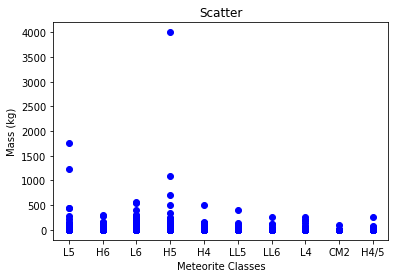

In [5]:
#Scatter plot of the ten meteorite classes on the x-axis and the mass of each meteorite on the y-axis
plt.scatter(df.recclass, df.mass/1000, marker = 'o', color = 'blue', label = 'mass')
plt.xlabel('Meteorite Classes')
plt.ylabel('Mass (kg)')
plt.title('Scatter')

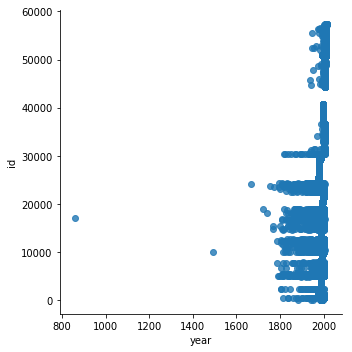

In [12]:
sns.lmplot('year', 'id', data=df, fit_reg=False)
#The plot shows that the landing frequency significantly increased starting from the 19th century

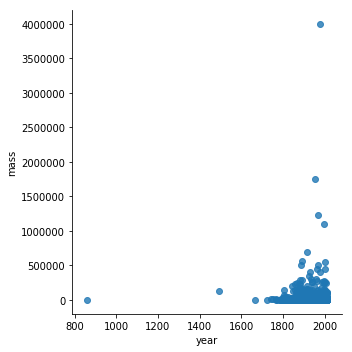

In [13]:
sns.lmplot('year', 'mass', data=df, fit_reg=False)
#The plot below shows that most of the contemporary meteorites are heavier

In [111]:
#Same scatter plot but with the Plotly Library - it's, I believe, more esthetic. 
data = [go.Scatter(x=df.year,
            y=df.mass, mode = 'markers'

              )]
py.iplot(data, filename='jupyter-basic_bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~youcefjd/0 or inside your plot.ly account where it is named 'jupyter-basic_bar'


/Users/youcefdjeddar/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [112]:
#Landings by class throughout the entire timescale 
random_x = df.year
random_y1 = df.recclass

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'markers',
    name = 'markers'
)

data = [trace0, trace1]
py.iplot(data, filename='scatter-mode')

The draw time for this plot will be slow for all clients.


/Users/youcefdjeddar/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [113]:
#Landings distribution on a map (using the properties lat and long)

mapbox_access_token = 'dhjrzm2c8j'
site_lat = df.reclat
site_lon = df.reclong
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        hoverinfo='text'
    ),
    ]





fig = dict(data=data)

py.iplot(fig, filename='jupyter-Meteorite-Landings')